In [1]:
#Importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [2]:
#Loading the Data
tweets_df = pd.read_csv("/Users/macmojave/Downloads/twitter.csv")
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
#Understanding the data
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [6]:
tweets_df=tweets_df.drop(['id'],axis=1)

In [7]:
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


<Axes: >

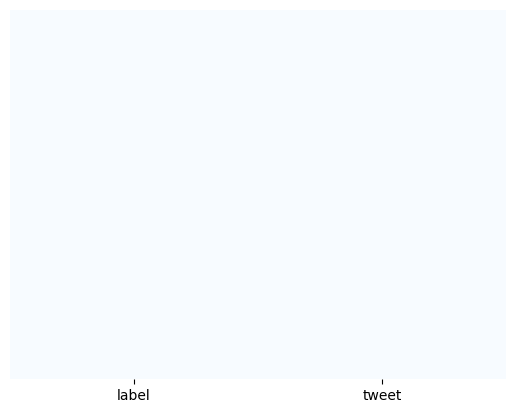

In [8]:
#Performing Data Exploration

#checking for null values

sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

<function matplotlib.pyplot.show(close=None, block=None)>

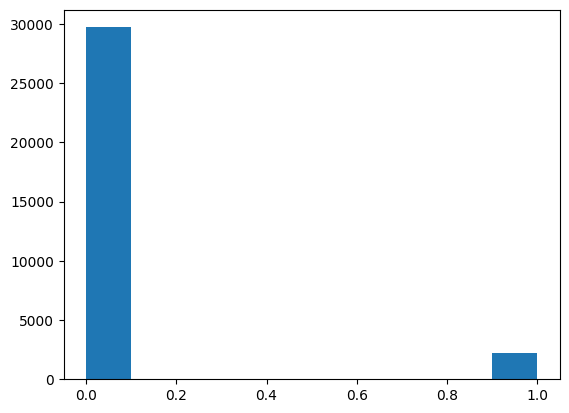

In [9]:
plt.hist(tweets_df['label'])
plt.show

array([[<Axes: title={'center': 'label'}>]], dtype=object)

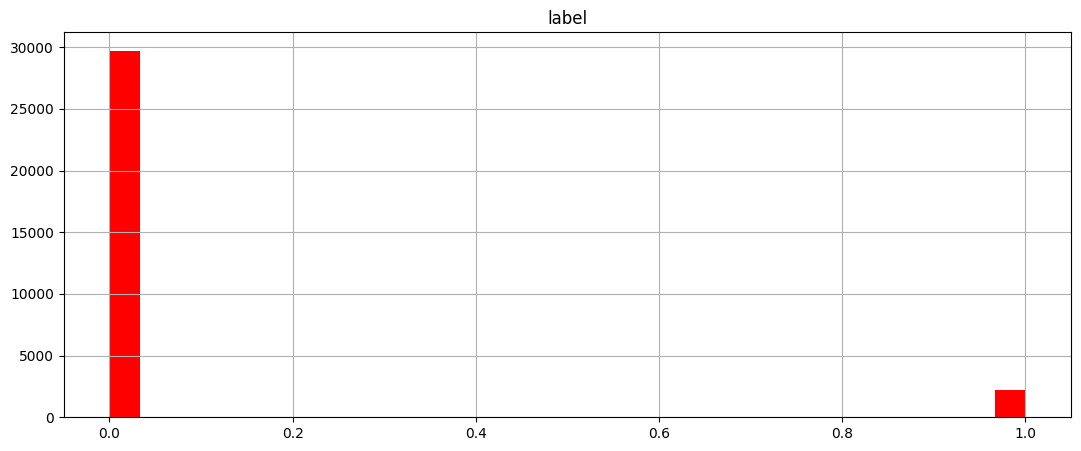

In [10]:
tweets_df.hist(bins=30, figsize = (13,5), color= 'r')

<Axes: xlabel='label', ylabel='Count'>

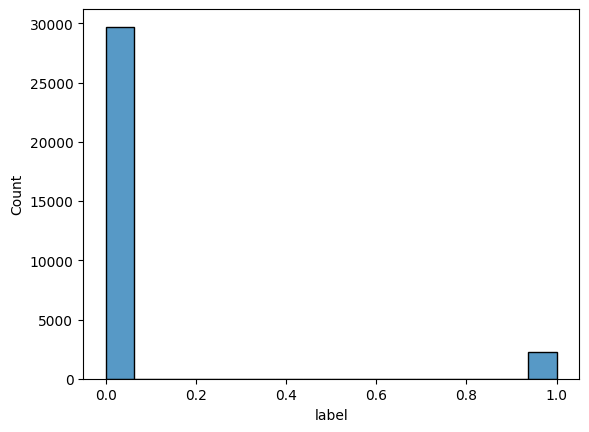

In [11]:
sns.histplot(tweets_df['label'])

<Axes: xlabel='label', ylabel='count'>

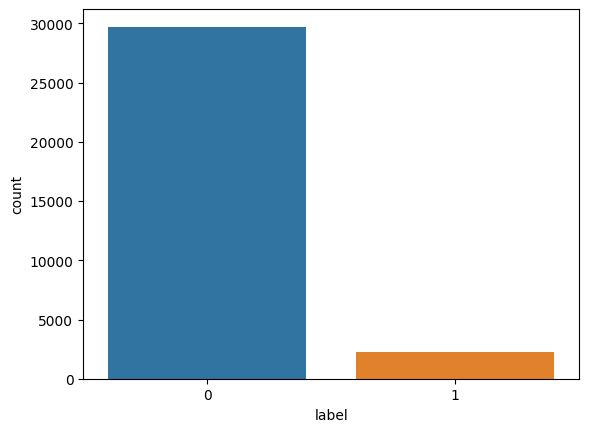

In [12]:
sns.countplot(x=tweets_df['label'], label='Count')

In [13]:
#length of the messages

#l1 = word for word in tweets['tweet'] len(word)

tweets_df['Length'] = tweets_df['tweet'].apply(len)
tweets_df

,label,tweet,Length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [14]:
tweets_df.describe()

,label,Length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [15]:
#Extracting the shortest tweet
tweets_df[tweets_df['Length'] ==11]['tweet']

25195    i love you 
Name: tweet, dtype: object

<Axes: ylabel='Frequency'>

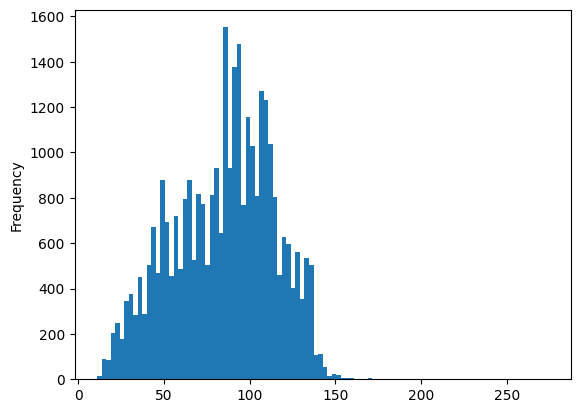

In [16]:
# Plotting the histogram of the length column

tweets_df['Length'].plot(bins =100, kind= 'hist')

In [17]:
#Wordcloud

#separating positive and negative df

positive = tweets_df[tweets_df['label'] ==0]
positive

,label,tweet,Length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [18]:
negative = tweets_df[tweets_df['label'] ==1]
negative

,label,tweet,Length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [19]:
sentences = tweets_df['tweet'].tolist()
len(sentences)

31962

In [ ]:
sentences_as_one_string =" ".join(sentences)
sentences_as_one_string

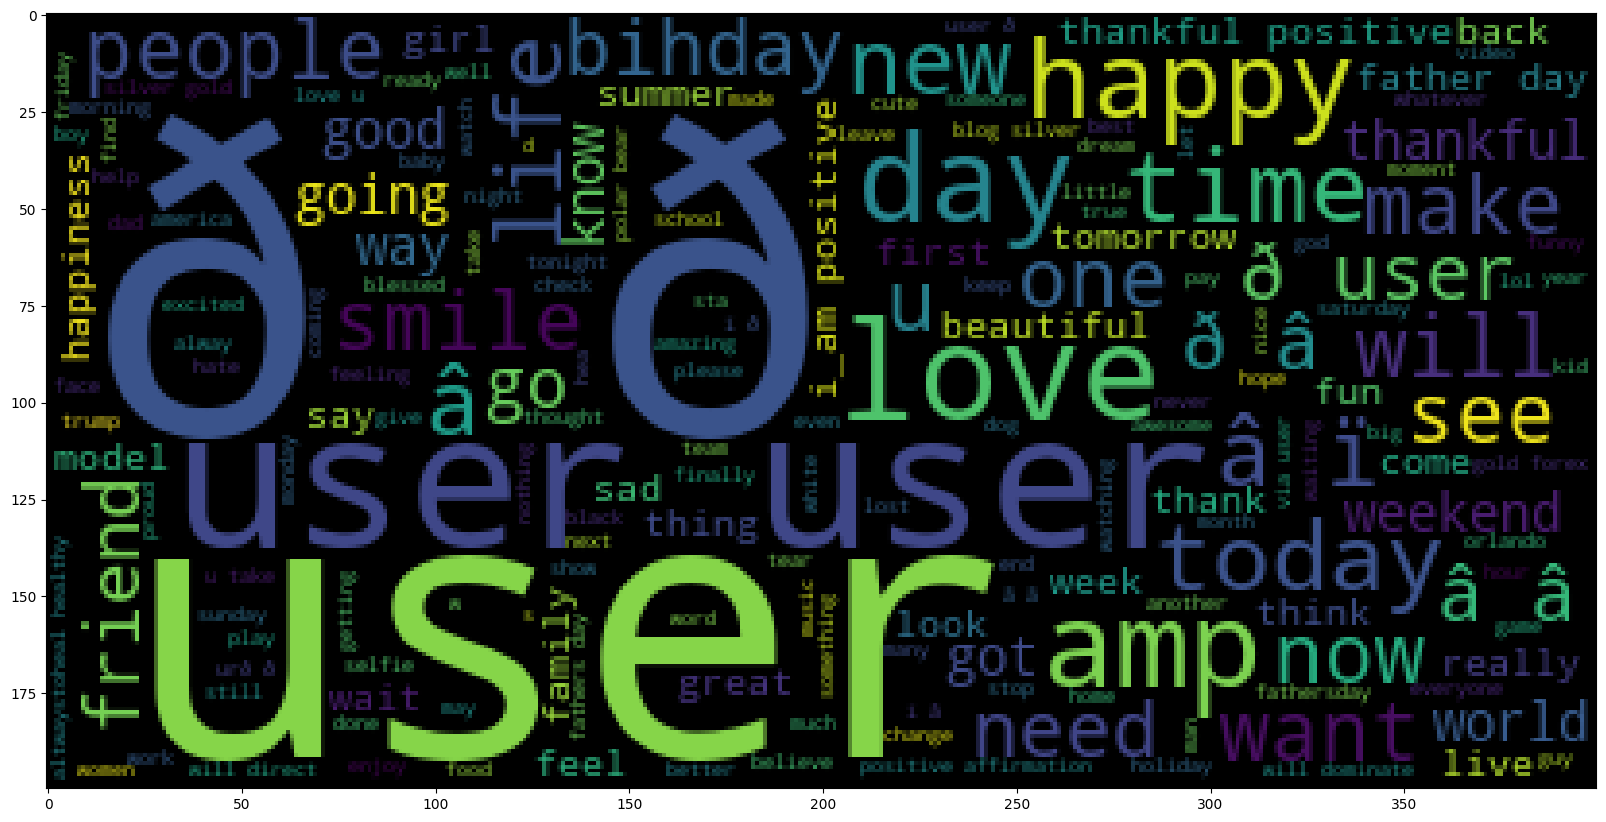

In [21]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

# Performing DATA CLEANING - removing punctuations & stopwords

In [22]:
import string
word_clean = [word for word in sentences_as_one_string if word not in string.punctuation]
word_clean_join = ''.join(word_clean)
word_clean_join

' user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthanked   bihday your majesty model   i love u take with u all the time in urð\x9f\x93± ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide society now    motivation 22 huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo    user camping tomorrow user user user user user user user dannyâ\x80¦ the next school year is the year for examsð\x9f\x98¯ cant think about that ð\x9f\x98\xad school exams   hate imagine actorslife revolutionschool girl we won love the land allin cavs champions cleveland clevelandcavaliers  â\x80¦   user user welcome here   im   its so gr8    â\x86\x9d ireland consumer price index mom climbed from previous 02 to 05 in may   blog silver gold forex we are so selfish o

In [23]:
# Let's define a function to clean up all the messages 
# The function performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [24]:
from nltk.corpus import stopwords

In [25]:
word_sp_clean = [word for word in word_clean_join.split() if word.lower() not in stopwords.words('english')]
word_sp_clean_join = ' '.join(word_sp_clean)

In [ ]:
word_sp_clean_join

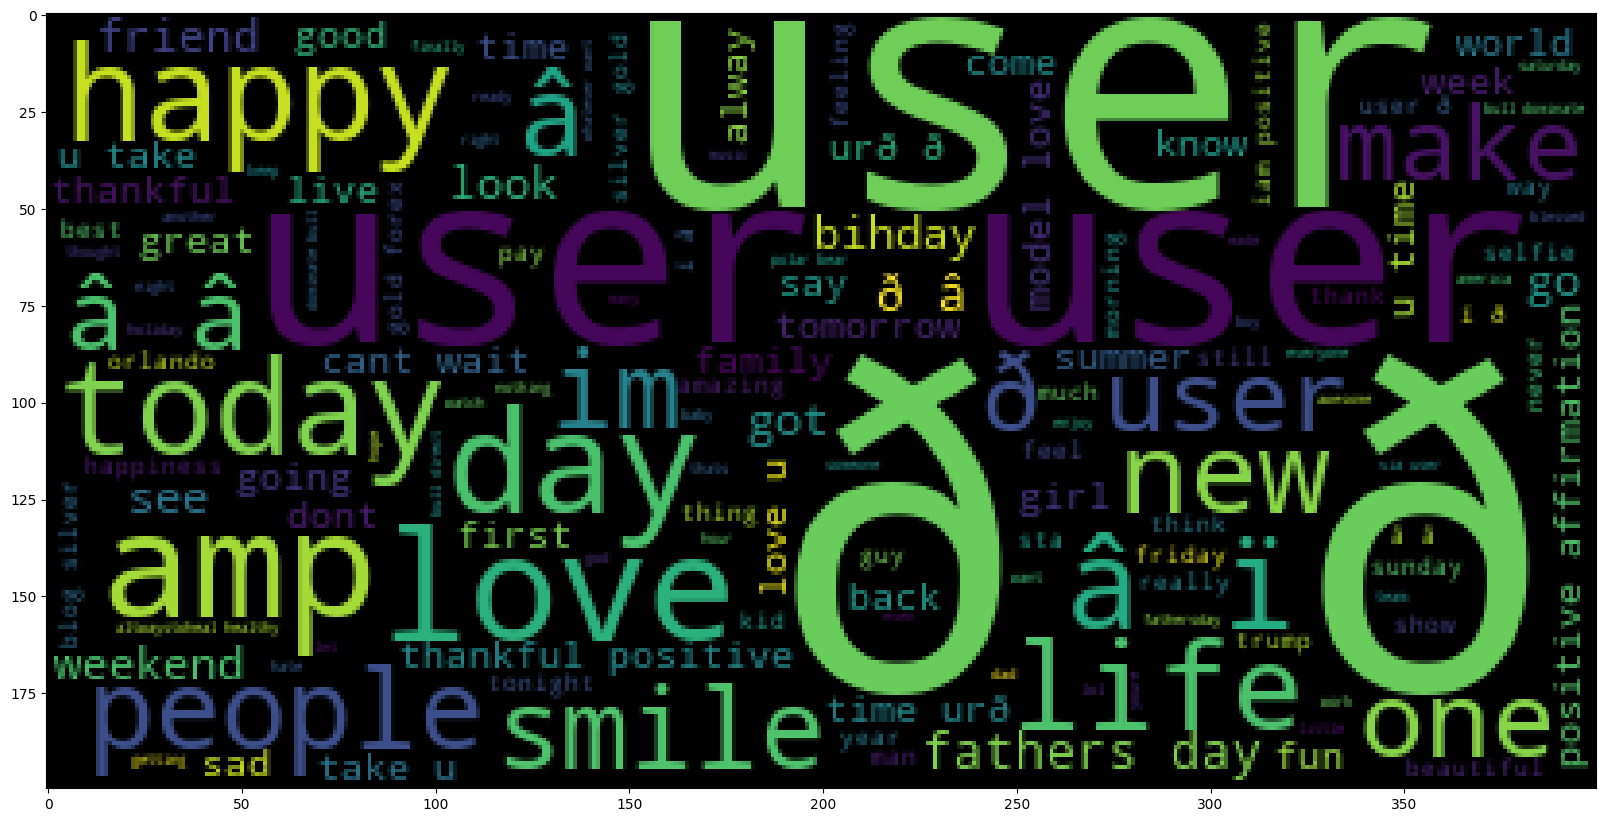

In [27]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(word_sp_clean_join))

In [28]:
from collections import Counter

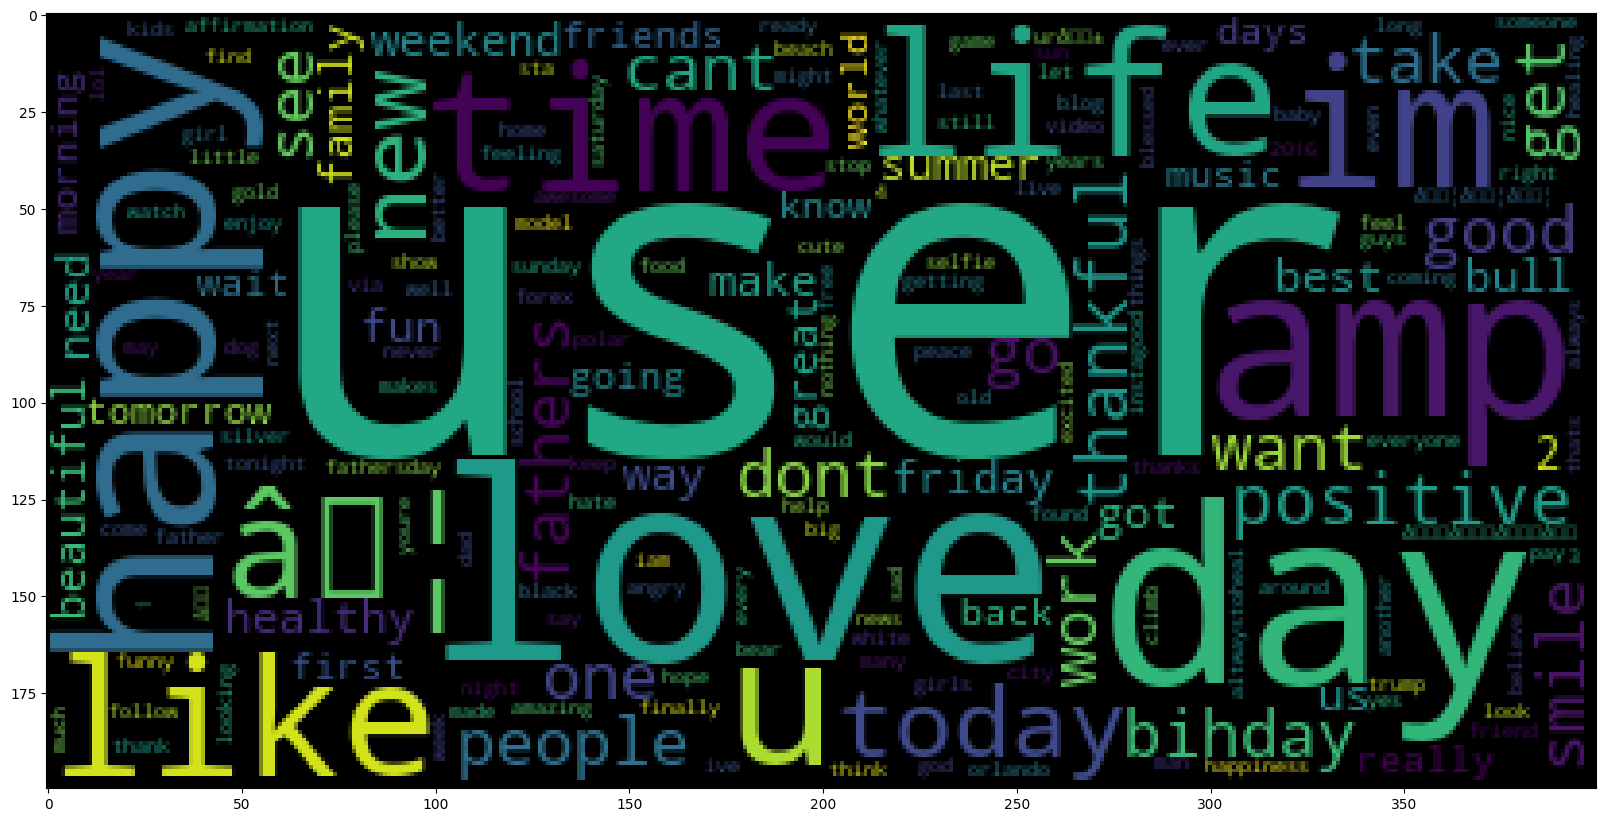

In [29]:
word_sp_clean_count = Counter(word_sp_clean)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate_from_frequencies(word_sp_clean_count))

'''
We saw different word clouds above, let's analyse our findings:
1) The first word cloud included all punctuations and stopwords which gave us some insights about the data
2) The 2nd word cloud had all the punc and stopwords removed but still resembled the 1st word cloud majorly
as the frequency of punctuations and stopwords were much lesser.
3) The 3rd word cloud had the clear data with punc and stopwords removed and frequency wise word distribution. 
This gave us a much clearer idea about the data than the previous 2 word clouds. - HIGH PRECISION, RELIABLE DATA
'''

In [30]:
#using negative tweets data, lets see which words/phrases appear more frequently

negative_wc= negative["tweet"].tolist()
negative_wc1 = ' '.join(negative_wc)

In [31]:
negative_sp_clean = [word for word in negative_wc1.split() if word.lower() not in stopwords.words('english')]

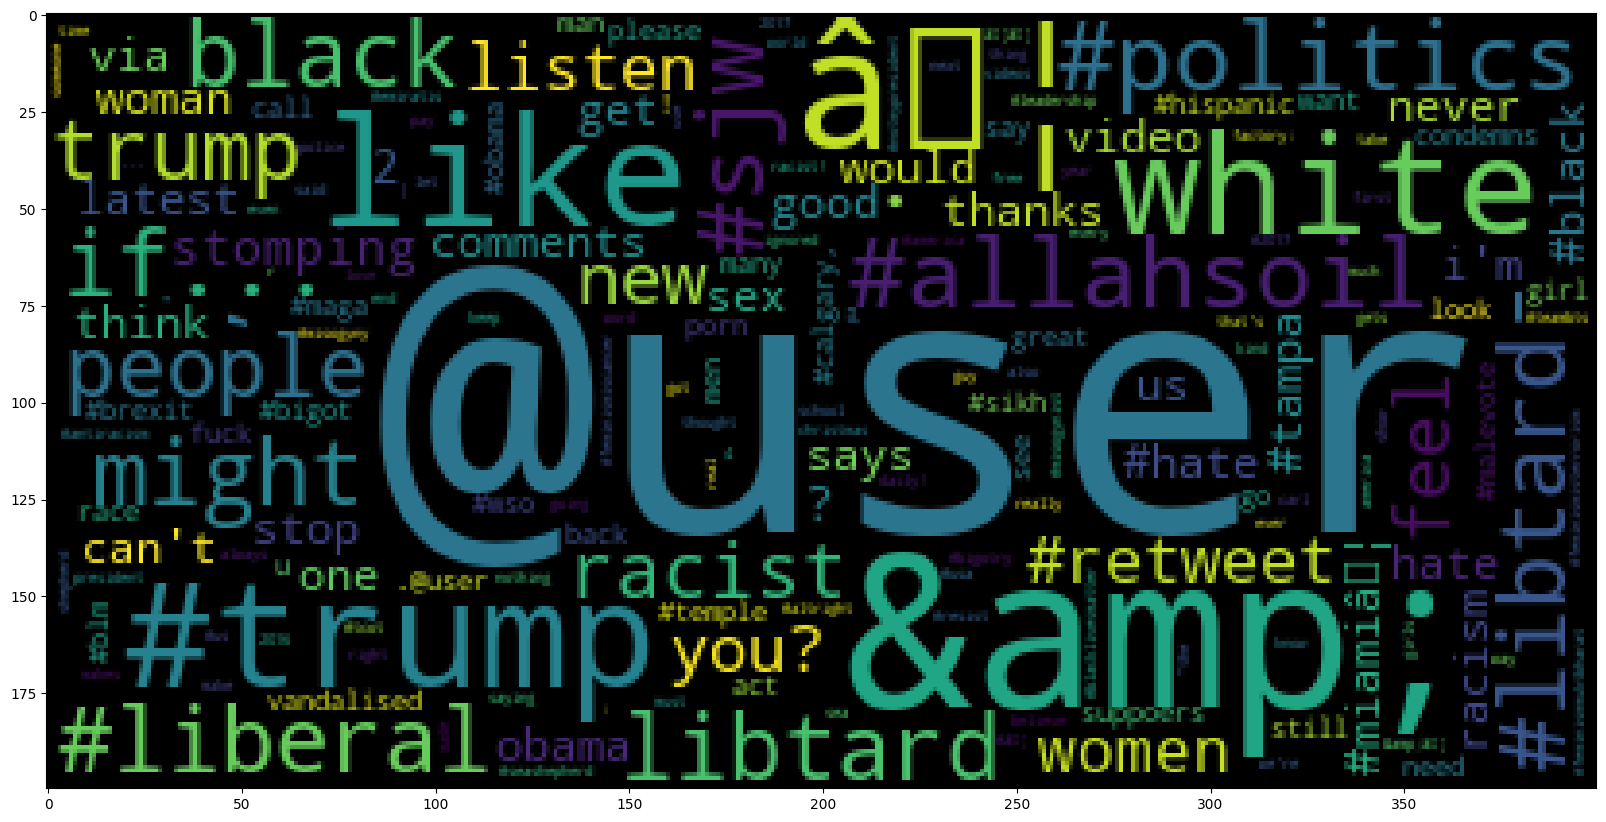

In [32]:
negative_sp_clean_count = Counter(negative_sp_clean)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate_from_frequencies(negative_sp_clean_count))

In [33]:
#!pip install scikit_learn

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the',
       'third', 'this'], dtype=object)

In [35]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [36]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

In [37]:
X2 = vectorizer2.fit_transform(sample_data)

In [38]:
vectorizer2.get_feature_names_out()

array(['and this', 'document is', 'first paper', 'is the', 'is this',
       'second paper', 'the first', 'the second', 'the third',
       'third one', 'this document', 'this is', 'this the'], dtype=object)

In [39]:
print(X2.toarray())

[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


In [40]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(mini_challenge)
vectorizer.get_feature_names_out()

array(['hello', 'world'], dtype=object)

In [41]:
print(X.toarray()) #classifies correctly irrespective of font, casing (Hint: 'Hello' n 'hello' treated alike)

[[1 1]
 [2 1]
 [1 3]]


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [43]:
print(vectorizer.get_feature_names_out())

['0' '0000001' '00027' ... 'ó¾°\x80'
 'ó¾°\x80ó¾\x8d\x92ó¾\x86\x9fó¾\x86¤ó¾®\x9fó¾\x92ºó¾®\x9eó¾\x94\x9bó¾\x94\x83ó¾\x95\x86'
 'ó¾°\x80ó¾°\x80ó¾°\x80']


In [44]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [45]:
tweets_countvectorizer.shape

(31962, 47386)

In [46]:
X = pd.DataFrame(tweets_countvectorizer.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
y = tweets_df['label']
y.shape

(31962,)

# Train and Evaluate a Naive Bias Classification Model

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
clf = MultinomialNB(force_alpha=True)
clf.fit(X_train, y_train)
#MultinomialNB(force_alpha=True)
#print(clf.predict(X_test))

MultinomialNB(force_alpha=True)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

<Axes: >

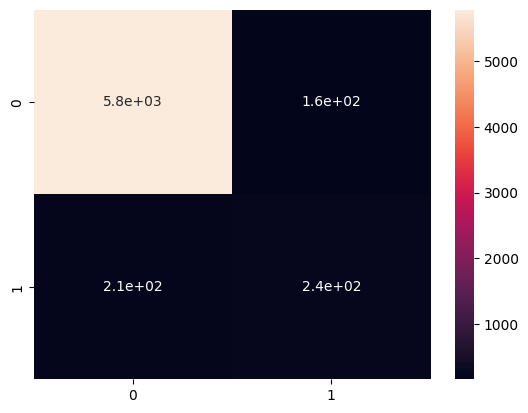

In [54]:
# Predicting the Test set results
y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [55]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5942
           1       0.61      0.54      0.57       451

    accuracy                           0.94      6393
   macro avg       0.79      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393

